In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv('Bengaluru_House_Data.csv')

In [ ]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
for column in data.columns:
  print(data[column].value_counts())
  print("*"*25)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
*************************
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
*************************
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64
*************************
2 BHK         519

In [ ]:
data.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [ ]:
data.drop(columns=['area_type','availability','society'],inplace=True)

In [ ]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   balcony     12711 non-null  float64
 5   price       13320 non-null  float64
dtypes: float64(3), object(3)
memory usage: 624.5+ KB


In [ ]:
data['location']= data['location'].fillna('Sarjapur Road')

In [ ]:
data['size']= data['size'].fillna('2 BHK')

In [ ]:
data['bath']= data['bath'].fillna(data['bath'].median())

In [ ]:
data['balcony']= data['balcony'].fillna(data['balcony'].median())

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   balcony     13320 non-null  float64
 5   price       13320 non-null  float64
dtypes: float64(3), object(3)
memory usage: 624.5+ KB


In [ ]:
data['bhk']=data['size'].str.split().str.get(0).astype(int)

In [ ]:
data[data.bhk>10].value_counts()

location                       size        total_sqft  bath  balcony  price  bhk
1 Annasandrapalya              11 Bedroom  1200        6.0   3.0      150.0  11     1
1 Giri Nagar                   11 BHK      5000        9.0   3.0      360.0  11     1
1 Immadihalli                  11 BHK      6000        12.0  2.0      150.0  11     1
1 Ramamurthy Nagar             11 Bedroom  1200        11.0  0.0      170.0  11     1
1Channasandra                  14 BHK      1250        15.0  0.0      125.0  14     1
1Hanuman Nagar                 19 BHK      2000        16.0  2.0      490.0  19     1
1Hoysalanagar                  13 BHK      5425        13.0  0.0      275.0  13     1
1Kasavanhalli                  18 Bedroom  1200        18.0  2.0      200.0  18     1
2Electronic City Phase II      27 BHK      8000        27.0  0.0      230.0  27     1
Koramangala Industrial Layout  16 BHK      10000       16.0  2.0      550.0  16     1
Munnekollal                    43 Bedroom  2400        40.0

In [ ]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
def convertRange(x):
  temp= x.split('-')
  if(len(temp)==2):
    return (float(temp[0])+float(temp[1]))/2
  try:
    return float(x)
  except:
    return None

In [ ]:
data['total_sqft']= data['total_sqft'].apply(convertRange)

In [ ]:
data.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [ ]:
data['price_per_sqft']=(data['price']*100000)/data['total_sqft']

In [ ]:
data['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [ ]:
data.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,1.603378,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,0.803067,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,0.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,1.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,2.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3.000000,3600.000000,43.000000,1.200000e+07


# **Adding Other as location for locations less than 10**

In [ ]:
data['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Uvce Layout                         1
Abshot Layout                       1
Name: location, Length: 1306, dtype: int64

In [ ]:
data['location']= data['location'].apply(lambda x: x.strip())
location_count = data['location'].value_counts()

In [ ]:
location_less_10=location_count[location_count<=10]
location_less_10

BTM 1st Stage                         10
Nagadevanahalli                       10
Basapura                              10
Sector 1 HSR Layout                   10
Dairy Circle                          10
                                      ..
1Channasandra                          1
Hosahalli                              1
Vijayabank bank layout                 1
near Ramanashree California resort     1
Abshot Layout                          1
Name: location, Length: 1054, dtype: int64

In [ ]:
location_count

Whitefield                            541
Sarjapur  Road                        399
Electronic City                       304
Kanakpura Road                        273
Thanisandra                           237
                                     ... 
1Channasandra                           1
Hosahalli                               1
Vijayabank bank layout                  1
near Ramanashree California resort      1
Abshot Layout                           1
Name: location, Length: 1295, dtype: int64

In [ ]:
data['location']= data['location'].apply(lambda x: 'other' if x in location_less_10 else x)

In [ ]:
data['location'].value_counts()

other                 2886
Whitefield             541
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: location, Length: 242, dtype: int64

# Removing **Outliers**

In [ ]:
data.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,1.603378,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,0.803067,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,0.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,1.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,2.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3.000000,3600.000000,43.000000,1.200000e+07


In [ ]:
#for each bhk how much sqft
(data['total_sqft']/data['bhk']).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [ ]:
data=data[((data['total_sqft']/data['bhk'])>=350)]
data.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000
mean,1607.132218,2.535632,1.610345,110.821913,2.620854,6180.567020
std,1274.763588,1.050086,0.793825,153.242304,0.944694,4014.487780
min,350.000000,1.000000,0.000000,8.440000,1.000000,267.829813
25%,1121.000000,2.000000,1.000000,49.000000,2.000000,4200.000000
50%,1309.500000,2.000000,2.000000,69.455000,3.000000,5262.147304
75%,1712.250000,3.000000,2.000000,115.000000,3.000000,6800.000000
max,52272.000000,16.000000,3.000000,3600.000000,16.000000,176470.588235


In [ ]:
def sqft_outlier_remove(df):
  df_output = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m = np.mean(subdf.price_per_sqft)
    std = np.std(subdf.price_per_sqft)
    gen_df = subdf[(subdf.price_per_sqft>(m-std)) & (subdf.price_per_sqft<=(m+std))]
    df_output = pd.concat([df_output,gen_df],ignore_index= True)
  return df_output
data= sqft_outlier_remove(data)
data.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,9903.000000,9903.000000,9903.000000,9903.000000,9903.000000,9903.000000
mean,1514.054492,2.458750,1.614157,91.094814,2.556094,5615.480324
std,885.402484,0.956586,0.784410,86.751764,0.872421,2196.536834
min,350.000000,1.000000,0.000000,10.000000,1.000000,1250.000000
25%,1115.000000,2.000000,1.000000,49.000000,2.000000,4246.928130
50%,1295.000000,2.000000,2.000000,67.000000,2.000000,5159.705160
75%,1650.000000,3.000000,2.000000,100.000000,3.000000,6381.137669
max,30400.000000,16.000000,3.000000,2200.000000,16.000000,24509.803922


In [ ]:
def bhk_outlier_remove(df):
  exclude_indices = np.array([])
  for location, location_df in df.groupby('location'):
    bhk_stats={}
    for bhk, bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk]= {
          'mean':np.mean(bhk_df.price_per_sqft),
          'std': np.std(bhk_df.price_per_sqft),
          'count': bhk_df.shape[0]
      }
    for bhk, bhk_df in location_df.groupby('bhk'):
      stats = bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices, axis='index')

In [ ]:
data= bhk_outlier_remove(data)

In [ ]:
data.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,7079.000000,7079.000000,7079.000000,7079.000000,7079.000000,7079.000000
mean,1508.132064,2.437067,1.576776,99.228920,2.486509,6078.746336
std,873.911505,0.997150,0.780703,93.933592,0.910712,2335.917282
min,350.000000,1.000000,0.000000,10.000000,1.000000,1300.000000
25%,1100.000000,2.000000,1.000000,50.000000,2.000000,4601.641931
50%,1270.000000,2.000000,2.000000,73.000000,2.000000,5664.488017
75%,1688.000000,3.000000,2.000000,112.000000,3.000000,6833.184789
max,30000.000000,16.000000,3.000000,2200.000000,16.000000,24509.803922


In [ ]:
data.drop(columns=['size','price_per_sqft'], inplace=True)

# Data cleaned from **outliers**

In [ ]:
data.head()

,location,total_sqft,bath,balcony,price,bhk
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2


In [ ]:
data.to_csv("Clean_data.csv")

In [ ]:
X=data.drop(columns=['price'])
y=data['price']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(5663, 5)
(1416, 5)


# Applying Linear Regression

In [ ]:
column_trans = make_column_transformer((OneHotEncoder(sparse=False),['location']),remainder = 'passthrough')

In [ ]:
scaler = StandardScaler()

In [ ]:
lr = LinearRegression()

In [ ]:
pipe = make_pipeline(column_trans, scaler, lr)

In [ ]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
y_pred_lr = pipe.predict(X_test)
r2_score(y_test,y_pred_lr)

0.9316803850458


# Applying **Lasso**

In [ ]:
lasso = Lasso()

In [ ]:
pipe = make_pipeline(column_trans, scaler, lasso)

In [ ]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [ ]:
y_pred_lasso = pipe.predict(X_test)
r2_score(y_test,y_pred_lasso)

0.6865328732912933

In [ ]:
import pickle

In [ ]:
pickle.dump(pipe, open('LinearRegression.pkl','wb'))

In [ ]:
data = pd.read_csv('Clean_data.csv')

In [ ]:
pipe = pickle.load(open('LinearRegression.pkl','rb'))

In [ ]:
def predict():
  location = input("Enter location: ")
  bhk = float(input("Enter BHK: "))
  sqft = float(input("Enter sqft: "))
  bath = float(input("Enter bathrooms: "))
  balcony = float(input("Enter balconies: "))

  ip = pd.DataFrame([[location,sqft,bath,bhk,balcony]],columns=['location','total_sqft','bath','bhk','balcony'])
  prediction = pipe.predict(ip)[0]

  print(str(np.round(prediction,2)))
  return location

In [ ]:
predict()


# z score **implementation**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

<Axes: ylabel='price'>

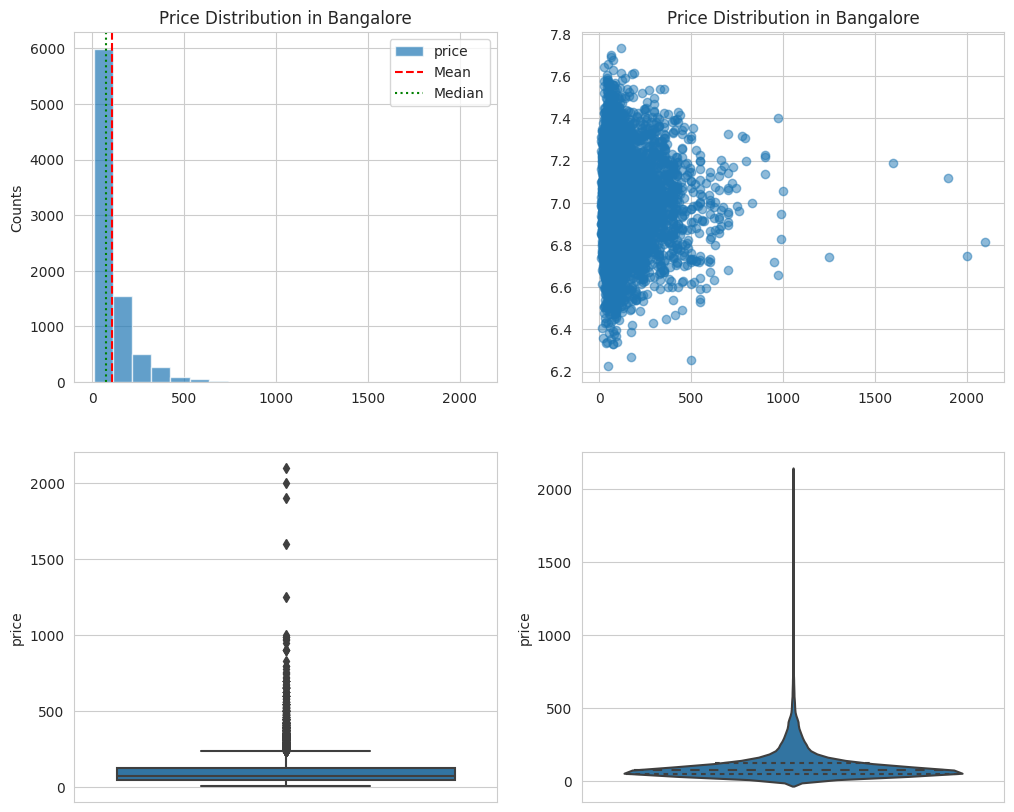

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
data['price'].hist(bins=20, label='price', alpha=0.7)
plt.axvline(np.mean(data['price']), ls='--', c='r', label="Mean")
plt.axvline(np.median(data['price']), ls=':', c='g', label="Median")
plt.ylabel("Counts")
plt.title("Price Distribution in Bangalore")
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(data['price'], np.random.normal(7, 0.2, size=data.shape[0]), alpha=0.5)
plt.title("Price Distribution in Bangalore")

plt.subplot(2, 2, 3)
sns.boxplot(y="price", data=data)

plt.subplot(2, 2, 4)
sns.violinplot(y="price", data=data, inner="quartile", bw=0.2)

In [ ]:
from scipy.stats import norm
from scipy.stats import multivariate_normal as mn

def z_score(df, threshold=1):
    mean, std = np.mean(df), np.std(df)
    z_score = np.abs((df - mean) / std)
    good = z_score < threshold
    print(f"z-score of {threshold} corresponds to a prob of {100 * 2 * norm.sf(3):0.2f}%")
    print(f"Rejection {(~good).sum()} points")
    return good

In [ ]:
z_score(data['price'], threshold=2).sum()

z-score of 2 corresponds to a prob of 0.27%
Rejection 395 points


8091

z-score of 2 corresponds to a prob of 0.27%
Rejection 395 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 162 points
z-score of 4 corresponds to a prob of 0.27%
Rejection 72 points
z-score of 5 corresponds to a prob of 0.27%
Rejection 34 points


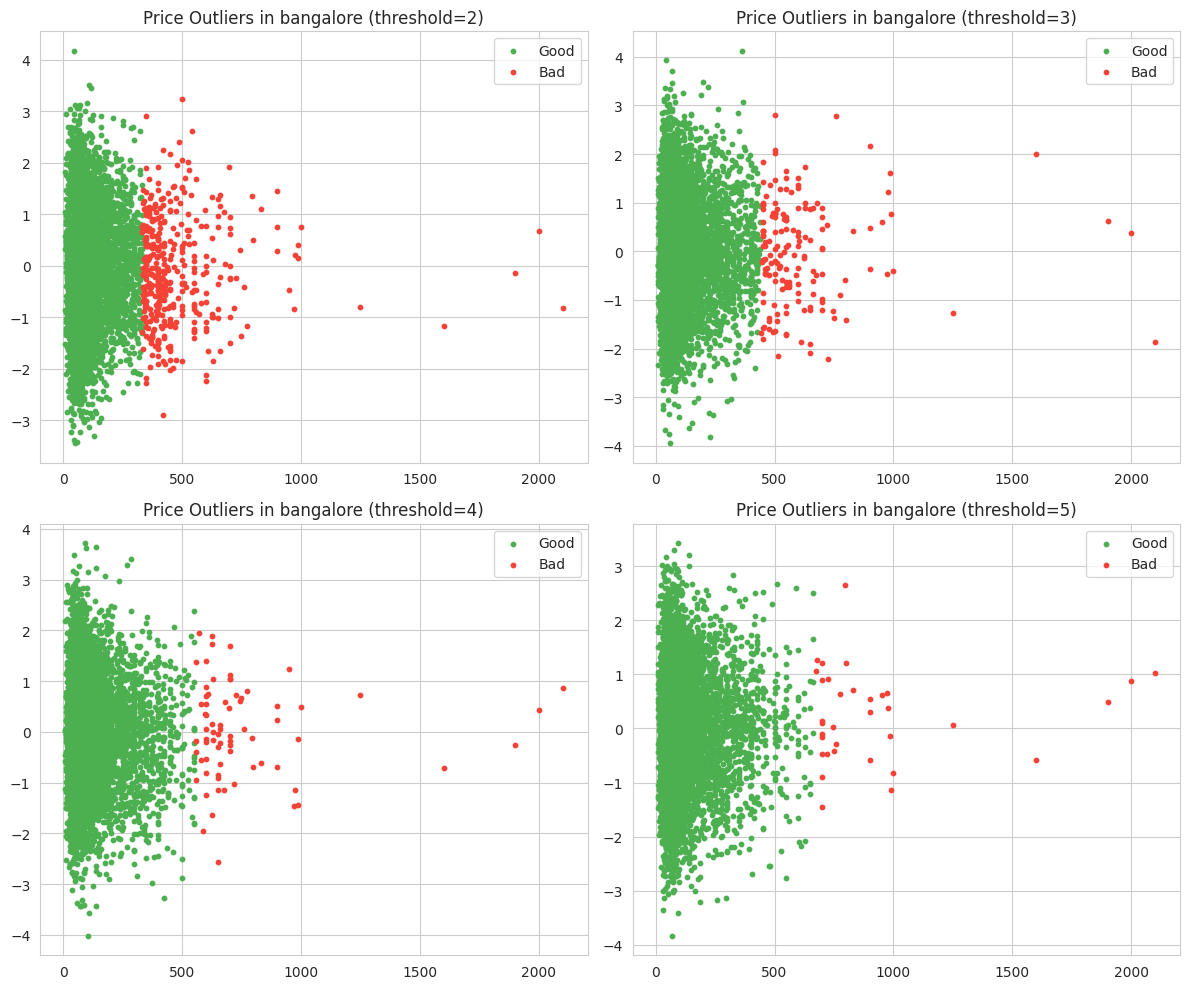

In [ ]:
plt.figure(figsize=(12, 10))

for i, threshold in zip(range(1, 5), range(2, 6)):
    plt.subplot(2, 2, i)
    visual_scatter = np.random.normal(size=data.shape[0])
    good = z_score(data['price'], threshold=threshold)
    plt.scatter(data['price'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
    plt.scatter(data['price'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
    plt.legend()
    plt.title(f"Price Outliers in bangalore (threshold={threshold})")

plt.tight_layout()

# Removing outliers using **pdf**

In [ ]:
df = data[['price', 'total_sqft']]

mean, cov = np.mean(df, axis=0), np.cov(df.T)
good = mn(mean, cov).pdf(df) > 0.000000001 / 100

Text(0.5, 1.0, ' Price vs Sqft')

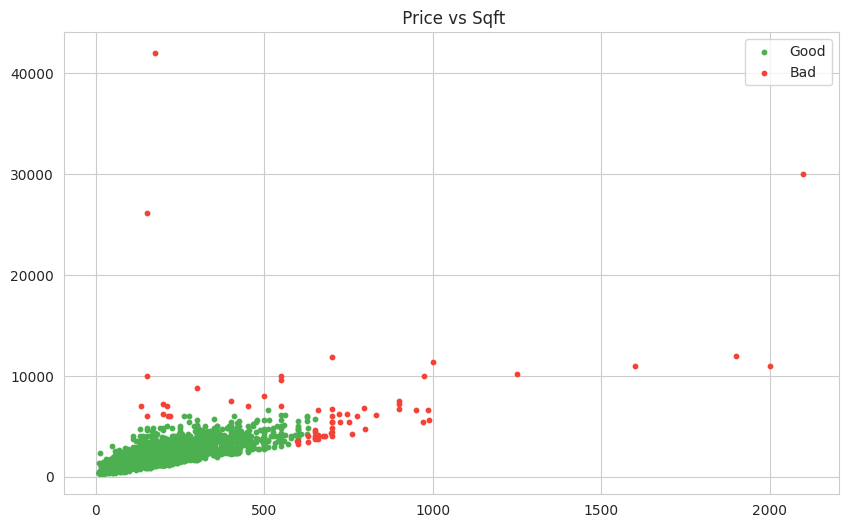

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(df[good]['price'], df[good]['total_sqft'], s=10, label="Good", color="#4CAF50")
plt.scatter(df[~good]['price'], df[~good]['total_sqft'], s=10, label="Bad", color="#F44336")
plt.legend()
plt.title(" Price vs Sqft")

In [ ]:
data.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000
mean,1607.132218,2.535632,1.610345,110.821913,2.620854,6180.567020
std,1274.763588,1.050086,0.793825,153.242304,0.944694,4014.487780
min,350.000000,1.000000,0.000000,8.440000,1.000000,267.829813
25%,1121.000000,2.000000,1.000000,49.000000,2.000000,4200.000000
50%,1309.500000,2.000000,2.000000,69.455000,3.000000,5262.147304
75%,1712.250000,3.000000,2.000000,115.000000,3.000000,6800.000000
max,52272.000000,16.000000,3.000000,3600.000000,16.000000,176470.588235


In [ ]:
def sqft_z_score_outlier_remove(df):
  df_output = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m = np.mean(subdf.price_per_sqft)
    std = np.std(subdf.price_per_sqft)
    upper_limit = data.price_per_sqft.mean()+ 2*data.price_per_sqft.std(),
    lower_limit = data.price_per_sqft.mean()- 2*data.price_per_sqft.std()
    gen_df = subdf[(subdf.price_per_sqft>=lower_limit) & (subdf.price_per_sqft<upper_limit)]
    df_output = pd.concat([df_output,gen_df],ignore_index= True)
  return df_output
data= sqft_z_score_outlier_remove(data)
data.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,11733.000000,11733.000000,11733.000000,11733.000000,11733.000000,11733.000000
mean,1563.674833,2.490838,1.610586,93.530145,2.583142,5643.764759
std,1224.462532,0.993855,0.787938,84.906841,0.905534,2152.938569
min,350.000000,1.000000,0.000000,8.440000,1.000000,267.829813
25%,1115.000000,2.000000,1.000000,48.000000,2.000000,4168.924303
50%,1300.000000,2.000000,2.000000,67.730000,2.000000,5181.818182
75%,1680.000000,3.000000,2.000000,105.000000,3.000000,6590.909091
max,52272.000000,16.000000,3.000000,2100.000000,16.000000,14166.666667


In [ ]:
upper_limit = data.price_per_sqft.mean()+ 4*data.price_per_sqft.std()
upper_limit


15422.41546546247

In [ ]:
lower_limit = data.price_per_sqft.mean()- 4*data.price_per_sqft.std()
lower_limit

-3264.922793363121

In [ ]:
data[(data.price_per_sqft>upper_limit)| (data.price_per_sqft<lower_limit)]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
707,Banashankari Stage II,5 Bedroom,2400.00,3.0,2.0,510.0,5,21250.000000
715,Banashankari Stage II,3 BHK,1200.00,2.0,1.0,198.0,3,16500.000000
1114,Benson Town,3 BHK,2850.00,4.0,3.0,470.0,3,16491.228070
1118,Benson Town,2 Bedroom,1688.12,2.0,1.0,270.0,2,15994.123640
1119,Benson Town,3 BHK,1805.00,3.0,2.0,280.0,3,15512.465374
1120,Benson Town,2 Bedroom,1688.00,2.0,0.0,280.0,2,16587.677725
1423,Chamrajpet,2 Bedroom,1050.00,2.0,1.0,162.0,2,15428.571429
1425,Chamrajpet,1 BHK,505.00,1.0,0.0,85.0,1,16831.683168
1615,Cunningham Road,4 BHK,5270.00,4.0,3.0,1250.0,4,23719.165085
1616,Cunningham Road,3 BHK,3875.00,3.0,2.0,864.0,3,22296.774194


# **Mathplot lib graphs**

In [ ]:
from matplotlib import mlab
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np

q = pd.read_csv("Clean_data.csv")

In [ ]:
def graph(l):
  for location, location_df in q.groupby('location'):
    bhk_stats={}
    if location == l:
      for bhk, bhk_df in location_df.groupby('bhk'):
        bhk_stats[bhk]={
            'mean': np.mean(bhk_df.price),
            'count': bhk_df.shape[0]
        }
      print(bhk_stats)
      return bhk_stats

Enter location: l


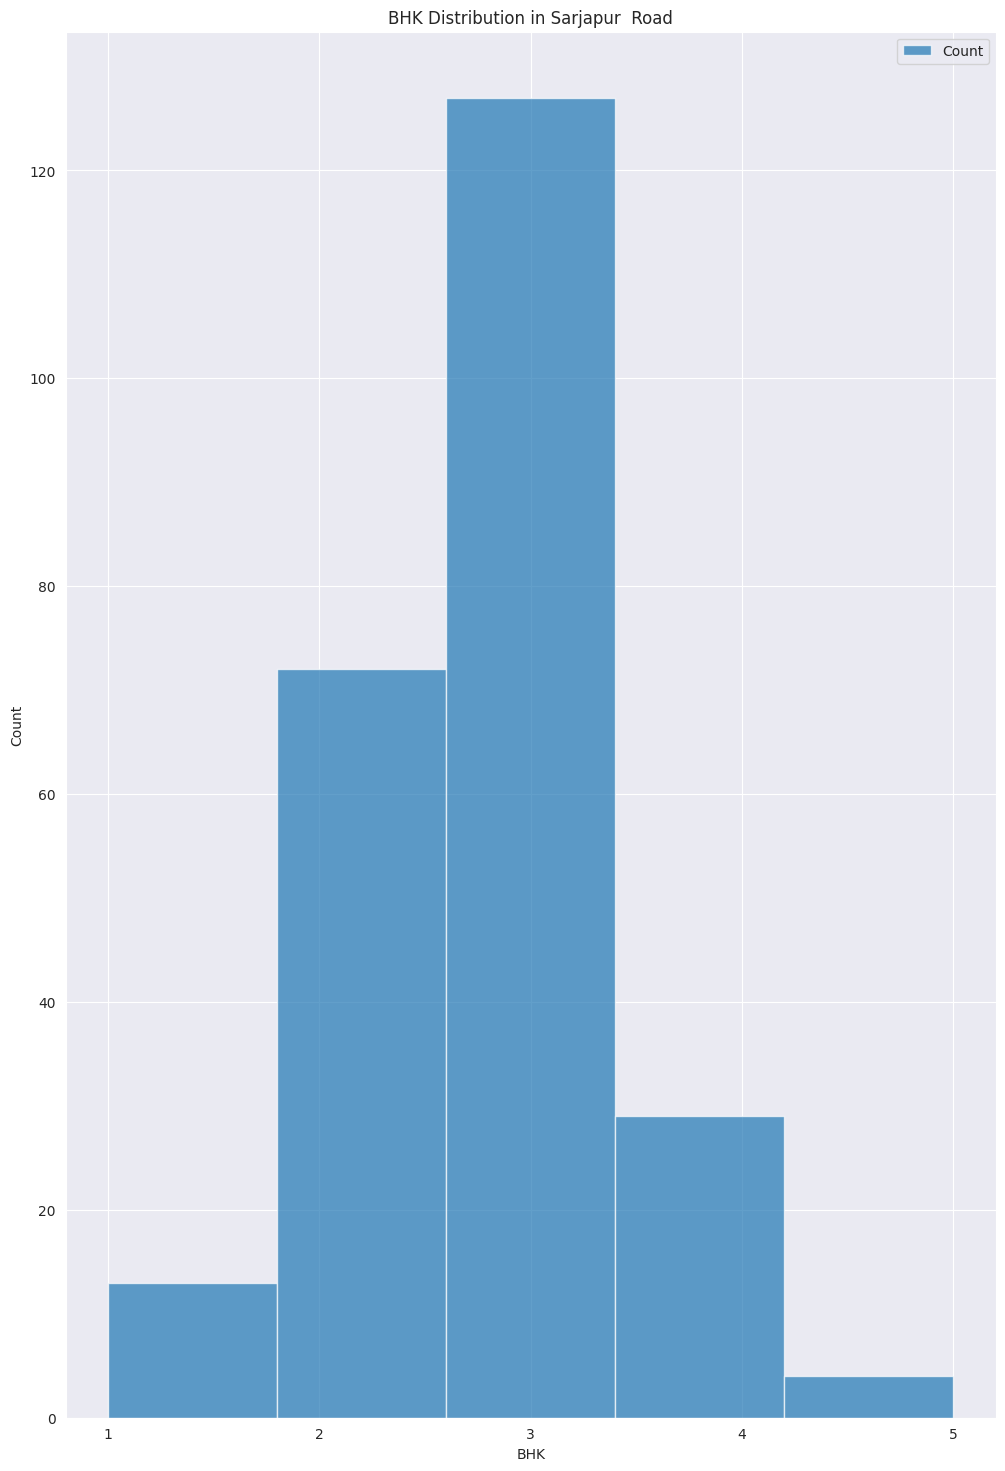

In [ ]:
l=str(input("Enter location: "))
l='Sarjapur  Road'
plt.figure(figsize=(12, 18))
plt.subplot(2, 2, 1)
for location, location_df in q.groupby('location'):
  if location == l:
    location_df['bhk'].hist(bins=5, label='Count', alpha=0.7)
plt.xlabel("BHK")
plt.xticks(range(1,6))
plt.ylabel("Count")
plt.title("BHK Distribution in "+l)
plt.legend()




Enter location: Sarjapur
Enter bhk2
Enter prediction100


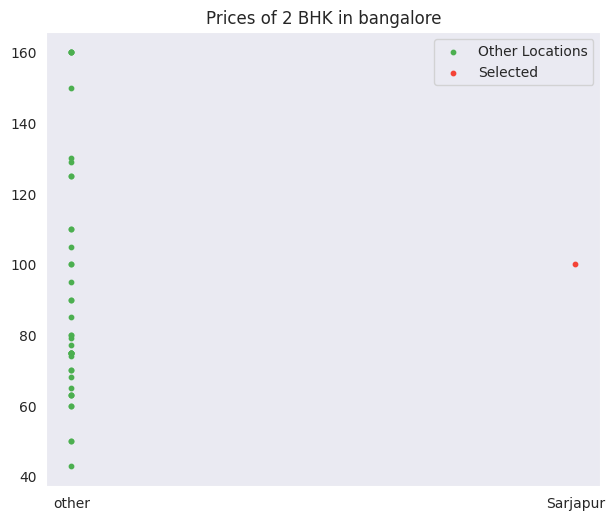

In [ ]:

l=input("Enter location: ")
b=int(input("Enter bhk: "))

df = q.sort_values('location', ascending = False).head(150)
df=df[df.bhk==b]
plt.subplot(2, 2, 1)
visual_scatter = np.random.normal(size=df.shape[0])
plt.scatter(df['location'], df['price'], s=10, label="Other Locations", color="#4CAF50")
plt.scatter(l, x, s=10, label="Selected", color="#F44336")
plt.legend()
plt.title("Prices of 2 BHK in bangalore")

plt.tight_layout()


Enter bhk3


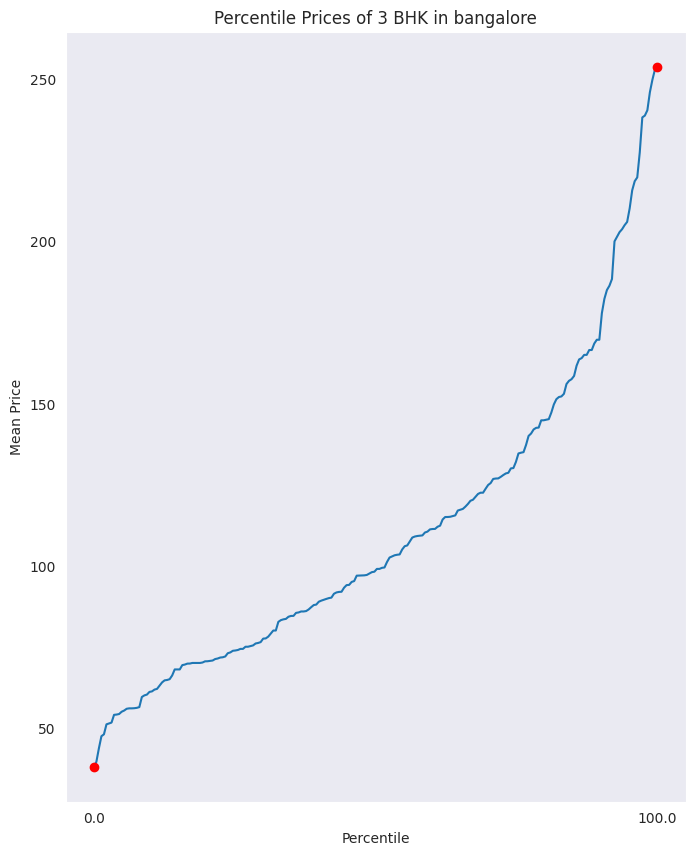

In [ ]:

b=int(input("Enter bhk"))
plt.figure(figsize=(8, 10))
x1=[]
d=[]
z3=[]
df=q[q.bhk==b]
for location, location_df in df.groupby('location'):
  x1.append(location_df['price'].mean())
x1.sort()
Q1=int(0.25*len(x1))
Q3=int(0.75*len(x1))
IQR = x1[Q3]-x1[Q1]
j=0
for i in x1:
  if(i<Q1-1.5*IQR) or (i>Q3+1.5*IQR):
    j+=1
  else:
    z3.append(i)
d=z3
p = np.array([0.0,  100.0])
perc = np.percentile(d, p)
plt.plot(d)
plt.plot((len(d)-1) * p/100., perc, 'ro')
plt.title("Percentile Prices of {} BHK in bangalore".format(b))
plt.xlabel("Percentile")
plt.ylabel("Mean Price")
plt.xticks((len(d)-1) * p/100., map(str, p))
plt.show()



In [ ]:
sum(x1)/len(x1)
Q1=int(0.25*len(x1))
Q3=int(0.75*len(x1))
IQR = x1[Q3]-x1[Q1]
print(len(x1))
print(Q1)
print(Q3)
print(IQR)
z3=[]
for i in x1:
  if(i<Q1-IQR) or (i>Q3+IQR/2):
    print("e")
  else:
    z3.append(i)

231
57
173
23.3563963963964
e
e
e
e
e
e
e
e
e


In [ ]:
print(z3)

[34.445, 36.25, 36.333333333333336, 36.777142857142856, 37.30157894736842, 37.623636363636365, 38.03666666666667, 38.46, 38.6, 38.635000000000005, 38.67076923076924, 39.0, 39.125, 39.481764705882355, 40.09947368421052, 40.166666666666664, 40.25328767123288, 40.376875, 40.815, 41.00555555555555, 41.063125, 41.24999999999999, 41.384, 41.6, 41.8875, 42.739444444444445, 42.95, 43.03333333333333, 43.333333333333336, 44.24227272727273, 44.67999999999999, 44.705, 44.805, 44.837162162162166, 45.25, 45.39, 45.90673913043479, 46.214285714285715, 46.267857142857146, 46.34615384615385, 46.71714285714285, 46.90909090909091, 47.13333333333333, 47.28947368421053, 47.40416666666667, 47.431538461538466, 47.67777777777778, 47.735, 47.744615384615386, 48.24333333333333, 48.25, 48.49636363636364, 48.647777777777776, 48.9445, 49.10526315789474, 49.215714285714284, 49.503750000000004, 49.51263157894737, 49.76769230769231, 49.92857142857143, 49.938095238095244, 50.00411764705882, 50.38461538461539, 50.65375,

In [ ]:
print(x1)

[28.424444444444447, 28.440909090909088, 31.075, 31.800666666666665, 32.163333333333334, 32.416666666666664, 32.99875, 33.30428571428571, 34.445, 36.25, 36.333333333333336, 36.777142857142856, 37.30157894736842, 37.623636363636365, 38.03666666666667, 38.46, 38.6, 38.635000000000005, 38.67076923076924, 39.0, 39.125, 39.481764705882355, 40.09947368421052, 40.166666666666664, 40.25328767123288, 40.376875, 40.815, 41.00555555555555, 41.063125, 41.24999999999999, 41.384, 41.6, 41.8875, 42.739444444444445, 42.95, 43.03333333333333, 43.333333333333336, 44.24227272727273, 44.67999999999999, 44.705, 44.805, 44.837162162162166, 45.25, 45.39, 45.90673913043479, 46.214285714285715, 46.267857142857146, 46.34615384615385, 46.71714285714285, 46.90909090909091, 47.13333333333333, 47.28947368421053, 47.40416666666667, 47.431538461538466, 47.67777777777778, 47.735, 47.744615384615386, 48.24333333333333, 48.25, 48.49636363636364, 48.647777777777776, 48.9445, 49.10526315789474, 49.215714285714284, 49.5037

In [ ]:

b=int(input("Enter bhk"))

x1=[]
d=[]
z3=[]
df=q[q.bhk==b]
for location, location_df in df.groupby('location'):
  x1.append(location_df['price'].mean())
x1.sort()
Q1=int(0.25*len(x1))
Q3=int(0.75*len(x1))
IQR = x1[Q3]-x1[Q1]
j=0
for i in x1:
  if(i<Q1-1.5*IQR) or (i>Q3+1.5*IQR):
    j+=1
  else:
    z3.append(i)
d=z3
p = np.array([0.0,  100.0])
perc = np.percentile(d, p)
plt.plot(d)
plt.figure(figsize=(8, 10))
plt.plot((len(d)-1) * p/100., perc, 'ro')
plt.title("Percentile Prices of {} BHK in bangalore".format(b))
plt.xlabel("Percentile")
plt.ylabel("Mean Price")
plt.xticks((len(d)-1) * p/100., map(str, p))
plt.show()

